<a href="https://colab.research.google.com/github/fenzhantw/traditional_market/blob/main/Cluster_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#한글폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import seaborn as sns
import gc,os,sys

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_colwidth', 30)

In [ ]:
df = pd.read_csv("/content/전통시장데이터(최종찐막0705).csv")
df.head()

In [ ]:
df.info()

In [67]:
df_copy = df[:]

In [ ]:
df_copy=df_copy.set_index('new index')
df_copy = df_copy.sort_index(ascending=True)
df_copy

In [ ]:
df_copy = df_copy.drop(['소재지지번주소','시장명','기존 index','법정동코드','행정동코드','시도명','시군구명','읍면동명'],axis=1,inplace=False)
df_copy.info()

In [ ]:
df_copy.isnull().sum()

In [7]:
##피처들의 평균/최대/최소/표준편차 확인 
print('### mean ###\n', df_copy[['점포수', '공중화장실보유여부', '주차장보유여부','운영기간']].mean())
print('### max ###\n',df_copy[['점포수', '공중화장실보유여부', '주차장보유여부','운영기간']].max())
print('### min ###\n',df_copy[['점포수', '공중화장실보유여부', '주차장보유여부','운영기간']].min())
print('### std ###\n',df_copy[['점포수', '공중화장실보유여부', '주차장보유여부','운영기간']].std())

### mean ###
 점포수          144.088997
공중화장실보유여부      0.841518
주차장보유여부        0.668524
운영기간          43.293915
dtype: float64
### max ###
 점포수          5493.0
공중화장실보유여부       1.0
주차장보유여부         1.0
운영기간          241.0
dtype: float64
### min ###
 점포수          0.0
공중화장실보유여부    0.0
주차장보유여부      0.0
운영기간         1.0
dtype: float64
### std ###
 점포수          297.224277
공중화장실보유여부      0.365294
주차장보유여부        0.470875
운영기간          24.714330
dtype: float64


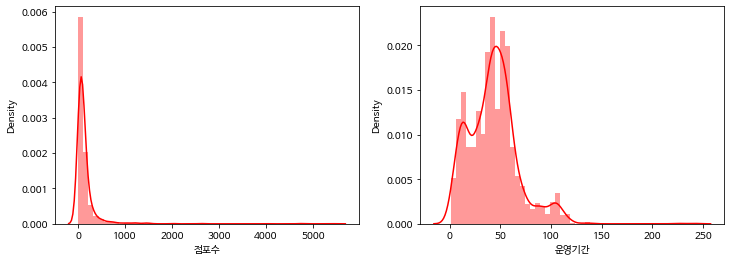

In [14]:
fig, axs = plt.subplots(figsize=(12, 4),nrows=1,ncols=2,squeeze=False)

sns.distplot(df_copy['운영기간'], label=1, color='red',ax=axs[0][1])
sns.distplot(df_copy['점포수'], label=1, color='red',ax=axs[0][0])

In [ ]:
df_copy['점포수'] = df_copy['점포수'].fillna(df_copy['점포수'].median())
df_copy['운영기간'] = df_copy['운영기간'].fillna(df_copy['운영기간'].mean())
df_copy['공중화장실보유여부'] = df_copy['공중화장실보유여부'].fillna(1)
df_copy['주차장보유여부'] = df_copy['공중화장실보유여부'].fillna(1)

df_copy.isnull().sum()

In [8]:
# columns=df_copy.dtypes.index.tolist()
# corr = df_copy[columns].corr()

In [ ]:
# plt.figure(figsize=(30, 30))
# sns.heatmap(corr, annot=True)

In [ ]:

from sklearn import preprocessing

# Get column names first
names = df_copy.columns
# Create the Scaler object
scaler = preprocessing.MinMaxScaler(feature_range =(0,1))
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df_copy)
scaled_df = pd.DataFrame(scaled_df, columns=names)

scaled_df

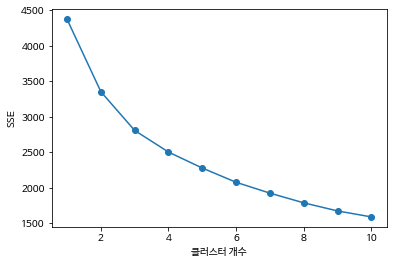

In [72]:
def elbow(X):
  sse = []
  for i in range(1, 11):
     km = KMeans(n_clusters=i,init='k-means++',random_state=7462)
     km.fit(X)
     sse.append(km.inertia_)
  
  plt.plot(range(1,11), sse, marker='o')
  plt.xlabel('클러스터 개수')
  plt.ylabel('SSE')
  plt.show()


elbow(scaled_df)

In [99]:
df_copy.head()

,위도,경도,5일장,복합장,상설장,점포수,공중화장실보유여부,주차장보유여부,운영기간,대형마트,주차장,지하철역,학교,편의점,"주유소,충전소",문화시설,관광명소,음식점,카페,공시지가,행정동 인구,행정동 인구 0 - 4세,행정동 인구 5 - 9세,행정동 인구 10 - 14세,행정동 인구 15 - 19세,행정동 인구 20 - 24세,행정동 인구 25 - 29세,행정동 인구 30 - 34세,행정동 인구 35 - 39세,행정동 인구 40 - 44세,행정동 인구 45 - 49세,행정동 인구 50 - 54세,행정동 인구 55 - 59세,행정동 인구 60 - 64세,행정동 인구 65 - 69세,행정동 인구 70 - 74세,행정동 인구 75 - 79세,행정동 인구 80 - 84세,행정동 인구 85 - 89세,행정동 인구 90 - 94세,행정동 인구 95 - 99세,행정동 인구 100+,행정시구 인구,행정시구 인구 0 - 4세,행정시구 인구 5 - 9세,행정시구 인구 10 - 14세,행정시구 인구 15 - 19세,행정시구 인구 20 - 24세,행정시구 인구 25 - 29세,행정시구 인구 30 - 34세,행정시구 인구 35 - 39세,행정시구 인구 40 - 44세,행정시구 인구 45 - 49세,행정시구 인구 50 - 54세,행정시구 인구 55 - 59세,행정시구 인구 60 - 64세,행정시구 인구 65 - 69세,행정시구 인구 70 - 74세,행정시구 인구 75 - 79세,행정시구 인구 80 - 84세,행정시구 인구 85 - 89세,행정시구 인구 90 - 94세,행정시구 인구 95 - 99세,행정시구 인구 100+,시도별 소득월액,농산물이 주요품목,클러스터
new index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,35.98798,129.4399,1,0,0,10.0,1.0,1.0,106.0,1,3,0,3,6,1,0,4,74,6,226113.0,9908,248,319,337,436,510,492,477,490,524,733,871,936,1030,811,608,515,328,167,62,12,2,230422,6809,10659,10532,10710,13063,13130,11591,15388,16615,19010,20748,20633,20915,15686,10211,7026,4564,2188,713,174,57,1301991,1,3
1,35.89156,129.4914,1,0,0,13.0,1.0,1.0,107.0,1,3,0,2,0,1,0,4,8,10,44629.0,4117,24,47,55,71,100,98,83,103,116,180,306,410,503,475,427,410,390,223,71,21,4,230422,6809,10659,10532,10710,13063,13130,11591,15388,16615,19010,20748,20633,20915,15686,10211,7026,4564,2188,713,174,57,1301991,1,3
2,36.12868,129.2619,1,0,0,22.0,1.0,1.0,56.0,1,0,0,2,0,1,0,0,9,2,95800.0,2873,21,47,35,44,100,79,62,69,88,128,193,280,420,348,265,242,235,157,52,5,3,272494,9233,12972,12453,13058,15794,14463,13898,18700,19331,22174,23935,24833,24309,17670,11477,8285,5717,2882,1044,211,55,1301991,1,3
3,36.06994,129.2085,1,0,0,18.0,1.0,1.0,98.0,1,1,0,1,2,1,0,0,38,18,159912.0,4920,30,56,80,112,140,153,101,127,137,232,364,539,622,604,440,463,401,217,85,15,2,272494,9233,12972,12453,13058,15794,14463,13898,18700,19331,22174,23935,24833,24309,17670,11477,8285,5717,2882,1044,211,55,1301991,1,3
4,36.16158,129.0954,1,0,0,18.0,1.0,1.0,102.0,1,2,0,3,0,1,0,2,19,4,46521.0,2126,15,24,28,28,38,28,33,39,45,83,156,236,325,273,231,190,198,111,37,8,0,272494,9233,12972,12453,13058,15794,14463,13898,18700,19331,22174,23935,24833,24309,17670,11477,8285,5717,2882,1044,211,55,1301991,1,3


In [73]:
# 4. 클러스터링

from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=4, random_state=7462, n_jobs=-1)
model = cluster.fit(scaled_df)

scaled_df['클러스터']=model.labels_

In [ ]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=2)
# pca_transformed = pca.fit_transform(scaled_df) 

# scaled_df['pca_x'] = pca_transformed[:,0]
# scaled_df['pca_y'] = pca_transformed[:,1]
# scaled_df.head()

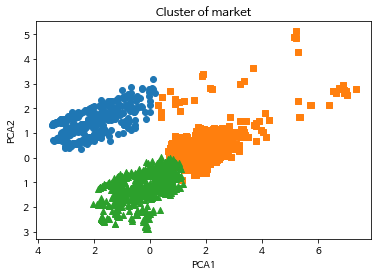

In [38]:
# marker0_ind = scaled_df[scaled_df['클러스터']==0].index
# marker1_ind = scaled_df[scaled_df['클러스터']==1].index
# marker2_ind = scaled_df[scaled_df['클러스터']==2].index

# plt.scatter(x=scaled_df.loc[marker0_ind, 'pca_x'], y=scaled_df.loc[marker0_ind, 'pca_y'], marker='o')
# plt.scatter(x=scaled_df.loc[marker1_ind, 'pca_x'], y=scaled_df.loc[marker1_ind, 'pca_y'], marker='s')
# plt.scatter(x=scaled_df.loc[marker2_ind, 'pca_x'], y=scaled_df.loc[marker2_ind, 'pca_y'], marker='^')

# plt.xlabel('PCA1')
# plt.ylabel('PCA2')
# plt.title('Cluster of market')
# plt.show()

In [ ]:
df_copy['클러스터']=model.labels_
df_copy.head(10)

In [84]:
df_cluster00 = df_copy[df_copy['클러스터']==0]
df_cluster01 = df_copy[df_copy['클러스터']==1]
df_cluster02 = df_copy[df_copy['클러스터']==2]
df_cluster03 = df_copy[df_copy['클러스터']==3]


# df_cluster01.to_csv("cluster01",index=False)
# df_cluster02.to_csv("cluster02",index=False)
# df_cluster03.to_csv("cluster03",index=False)
# df_cluster04.to_csv("cluster03",index=False)

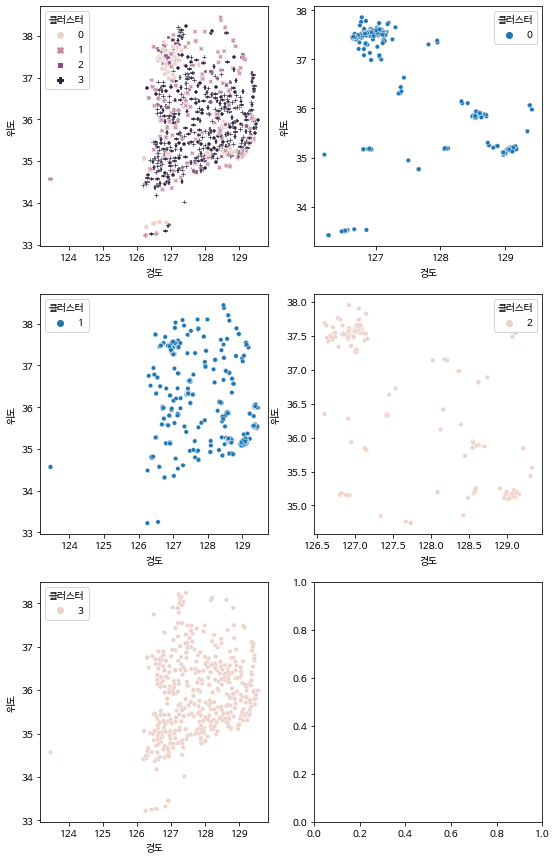

In [97]:
fig, axs = plt.subplots(figsize=(9, 15),nrows=3,ncols=2,squeeze=False)
sns.scatterplot(x='경도', y='위도', hue='클러스터', alpha=1, style='클러스터',s=20, data=df_copy,ax=axs[0][0])
sns.scatterplot(x='경도', y='위도', hue='클러스터', alpha=1, style='클러스터',s=20, data=df_cluster00,ax=axs[0][1])
sns.scatterplot(x='경도', y='위도', hue='클러스터', alpha=1, style='클러스터',s=20, data=df_cluster01,ax=axs[1][0])
sns.scatterplot(x='경도', y='위도', hue='클러스터', alpha=1, style='클러스터',s=20, data=df_cluster02,ax=axs[1][1])
sns.scatterplot(x='경도', y='위도', hue='클러스터', alpha=1, style='클러스터',s=20, data=df_cluster03,ax=axs[2][0])

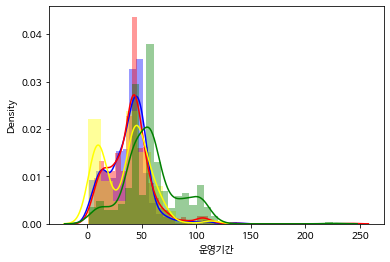

In [85]:
#운영기간

sns.distplot(df_cluster00['운영기간'], label=1, color='blue')
sns.distplot(df_cluster01['운영기간'], label=2, color='red')
sns.distplot(df_cluster02['운영기간'], label=3, color='yellow')
sns.distplot(df_cluster03['운영기간'], label=4, color='green')


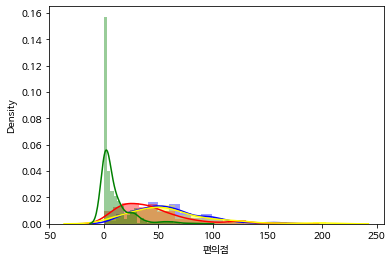

In [86]:
#
sns.distplot(df_cluster00['편의점'], label=1, color='blue')
sns.distplot(df_cluster01['편의점'], label=2, color='red')
sns.distplot(df_cluster02['편의점'], label=3, color='yellow')
sns.distplot(df_cluster03['편의점'], label=4, color='green')

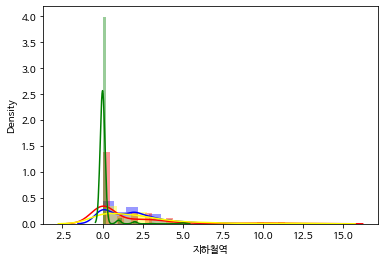

In [92]:
#
sns.distplot(df_cluster00['지하철역'], label=1, color='blue')
sns.distplot(df_cluster01['지하철역'], label=2, color='red')
sns.distplot(df_cluster02['지하철역'], label=3, color='yellow')
sns.distplot(df_cluster03['지하철역'], label=4, color='green')

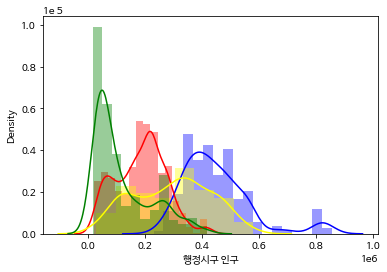

In [94]:
#
sns.distplot(df_cluster00['행정시구 인구'], label=1, color='blue')
sns.distplot(df_cluster01['행정시구 인구'], label=2, color='red')
sns.distplot(df_cluster02['행정시구 인구'], label=3, color='yellow')
sns.distplot(df_cluster03['행정시구 인구'], label=4, color='green')

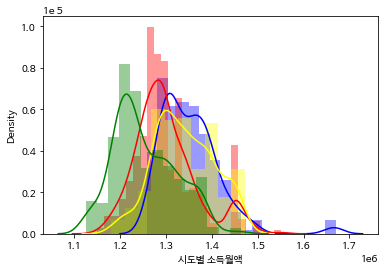

In [98]:
#
sns.distplot(df_cluster00['시도별 소득월액'], label=1, color='blue')
sns.distplot(df_cluster01['시도별 소득월액'], label=2, color='red')
sns.distplot(df_cluster02['시도별 소득월액'], label=3, color='yellow')
sns.distplot(df_cluster03['시도별 소득월액'], label=4, color='green')

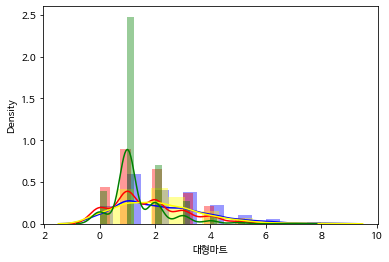

In [105]:
#
sns.distplot(df_cluster00['대형마트'], label=1, color='blue')
sns.distplot(df_cluster01['대형마트'], label=2, color='red')
sns.distplot(df_cluster02['대형마트'], label=3, color='yellow')
sns.distplot(df_cluster03['대형마트'], label=4, color='green')

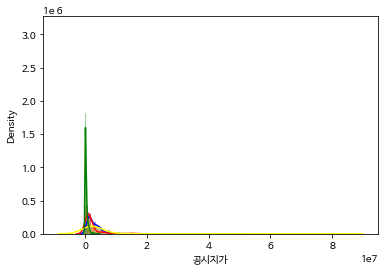

In [108]:
#
sns.distplot(df_cluster00['공시지가'], label=1, color='blue')
sns.distplot(df_cluster01['공시지가'], label=2, color='red')
sns.distplot(df_cluster02['공시지가'], label=3, color='yellow')
sns.distplot(df_cluster03['공시지가'], label=4, color='green')

In [ ]:
#클러스터를 진행할때 위도 경도를 제외해야할 듯
#행정동 인구를 20대, 30대 별로 합쳐야 할듯